# Visualizing HRRR Model Data Over a General Area Using Herbie
In this notebook we will download and plot HRRR data for a given date, level, and number of forecast hours.

In [8]:
#Import Modules
from herbie import Herbie
import xarray as xr
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import metpy.calc as mpcalc
from metpy.units import units
import imageio.v2 as imageio
from IPython.display import display, Image as IPImage

### Downloading the Data
Here you can input the date and pressure level, and then choose the number of forecast hours and forecast-hour interval.  This cell takes a bit of time to run for longer forecasts, especially for surface data, so be patient!

In [2]:
yr = input('Year (yyyy):')
m = input('Month (mm):')
d = input('Day (dd):')
level = input('Enter pressure level (surface, 1000 mb, 925 mb, 850 mb, etc.):')
fxx = input('Choose the number of forecast hours (up to 48):')
fxx_int = input('Select forecast hour interval:')
date = (f'{yr}-{m}-{d}')
x = np.arange(0, 1799)
y = np.arange(0, 1059)

#Create lists to feed the datasets into
fh = []
H = []
ds = []

#Create a looping statement that will read in all the data for each forecast hour
for a in range(0, int(fxx) + 1, int(fxx_int)):
    
    #Create a list of the forecast hours in "HH" format, this allows
    #for saving all images in order later for creating the gif
    if a <10:
        fh.append(f'0{a}')
    else:
        fh.append(f'{a}')
    
    #We need to specify the product based on the level we chose
    if level == str('surface'):
        product = "sfc"
    else:
        product = "prs"
    
    #Read in the data
    H.append(Herbie(f"{yr}-{m}-{d}",  # model run date
        model="hrrr",  # model name
        product=product, #product
        fxx=a,  # forecast lead time
              ))

for b in range(0, int(int(fxx) / int(fxx_int)) + 1):
    #Many of the important surface variables come from different datasets,
    #we will pull some of them out and create one combined dataset
    if level == str('surface'):
        ds.append(xr.Dataset(
            data_vars=dict(
                t = (["y", "x"], H[b].xarray(f":2 m above ground", remove_grib=False).t2m.values),
                dpt = (["y", "x"], H[b].xarray(f":2 m above ground", remove_grib=False).d2m.values),
                pt = (["y", "x"], H[b].xarray(f":2 m above ground", remove_grib=False).pt.values),
                u = (["y", "x"], H[b].xarray(f":10 m above ground", remove_grib=False).u10.values),
                v = (["y", "x"], H[b].xarray(f":10 m above ground", remove_grib=False).v10.values),
                wspd = (["y", "x"], H[b].xarray(f":10 m above ground", remove_grib=False).si10.values),
                cape = (["y", "x"], H[b].xarray(f":180-0 mb above ground:", remove_grib=False).cape.values),
                cin = (["y", "x"], H[b].xarray(f":180-0 mb above ground:", remove_grib=False).cin.values),
            ),
            coords=dict(
                longitude = (["y", "x"], H[b].xarray(f":2 m above ground", remove_grib=False).longitude.values),
                latitude = (["y", "x"], H[b].xarray(f":2 m above ground:", remove_grib=False).latitude.values),
                valid_time = (H[b].xarray(f":2 m above ground:", remove_grib=False).valid_time.values),
                step = (H[b].xarray(f":2 m above ground:", remove_grib=False).step.values))
        ))
        #Give the variables their full names
        ds[b].t.attrs['long_name'] = 'Temperature'
        ds[b].dpt.attrs['long_name'] = 'Dewpoint Temperature'
        ds[b].pt.attrs['long_name'] = 'Potential Temperature'
        ds[b].u.attrs['long_name'] = 'U Component of Wind'
        ds[b].v.attrs['long_name'] = 'V Component of Wind'
        ds[b].cape.attrs['long_name'] = 'Convective Available Potential Energy'
        ds[b].cin.attrs['long_name'] = 'Convective Inhibition'
        
    else:
        ds.append(H[b].xarray(f":{level}:", remove_grib=False))
        #Calculate wind speed and add it to the dataset
        ds[b]['wspd'] = (('y', 'x'), (mpcalc.wind_speed(ds[b].u.values*units.meter/units.second, 
                                                        ds[b].v.values*units.meter/units.second)).m)
    ds[b].wspd.attrs['long_name'] = 'Wind Speed'
ds[0].data_vars

Year (yyyy): 2024
Month (mm): 04
Day (dd): 25
Enter pressure level (surface, 1000 mb, 925 mb, 850 mb, etc.): 300 mb
Choose the number of forecast hours (up to 48): 48
Select forecast hour interval: 1


✅ Found ┊ model=hrrr ┊ product=prs ┊ 2024-Apr-25 00:00 UTC F00 ┊ GRIB2 @ local ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=prs ┊ 2024-Apr-25 00:00 UTC F01 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=prs ┊ 2024-Apr-25 00:00 UTC F02 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=prs ┊ 2024-Apr-25 00:00 UTC F03 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=prs ┊ 2024-Apr-25 00:00 UTC F04 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=prs ┊ 2024-Apr-25 00:00 UTC F05 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=prs ┊ 2024-Apr-25 00:00 UTC F06 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=prs ┊ 2024-Apr-25 00:00 UTC F07 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=prs ┊ 2024-Apr-25 00:00 UTC F08 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=prs ┊ 2024-Apr-25 00:00 UTC F09 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=prs ┊ 2024-Apr-25 00:00 UTC F10 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrr

Data variables:
    unknown  (y, x) float32 8MB ...
    t        (y, x) float32 8MB ...
    u        (y, x) float32 8MB 38.23 38.23 38.17 38.17 ... -1.893 -1.768 -1.58
    v        (y, x) float32 8MB 6.191 6.191 6.191 6.129 ... 27.82 27.63 27.38
    q        (y, x) float32 8MB ...
    w        (y, x) float32 8MB ...
    gh       (y, x) float32 8MB ...
    r        (y, x) float32 8MB ...
    dpt      (y, x) float32 8MB ...
    absv     (y, x) float32 8MB ...
    clwmr    (y, x) float32 8MB ...
    rwmr     (y, x) float32 8MB ...
    snmr     (y, x) float32 8MB ...
    grle     (y, x) float32 8MB ...
    wspd     (y, x) float32 8MB 38.73 38.73 38.67 38.66 ... 27.88 27.69 27.42

### Choose Variable
Choose a variable from the list above.  Once you enter it, you will get the full name of the variable.  Geopotential heights (gh) should not be chosen here, as they will already be plotted as contours for upper air maps.  Then you can choose whether or not you want synoptic scale (full CONUS) maps or mesoscale maps (zoomed in to an extent that you can set later).

In [3]:
var = input('Choose your variable (for cfill):')   
print(ds[0][f'{var}'].long_name)
extent = input("Choose your extent ('meso' for mesoscale, 'synoptic' for synoptic scale):")

Choose your variable (for cfill): wspd


Wind Speed


Choose your extent ('meso' for mesoscale, 'synoptic' for synoptic scale): synoptic


Here we will downsample the data to make it easier to read and faster to plot.

In [4]:
#Create lists for the downsampled data
var_ds = []
u_ds = []
v_ds = []
u_barbs = []
v_barbs = []
lon_barbs = []
lat_barbs = []
gh_ds = []

#Set the interval based on extent
if extent == str('meso'):
    interval = 15
    barb_interval = 1
    length = 7
elif extent == str('synoptic'):
    #We need to have a greater downsample interval here since we 
    #have a larger extent, this will make things easier to read
    interval = 20
    #Further downsample the wind barbs to cut down on overlap
    barb_interval = 3
    length = 6
    
#Create the downsample function
def downsample_data(data, interval):
    return data[::interval, ::interval]
#Lat and lon will always be the same, we only need to use one of the datasets
lon_ds = downsample_data(ds[0].longitude, interval)
lat_ds = downsample_data(ds[0].latitude, interval) 

#Fill in the other lists with the downsampled data
for b in range(0, int(int(fxx) / int(fxx_int)) + 1):
    var_ds.append(downsample_data(ds[b][f'{var}'], interval))
    u_ds.append(downsample_data(ds[b].u, interval))
    v_ds.append(downsample_data(ds[b].v, interval))
    u_barbs.append(downsample_data(u_ds[b], barb_interval))
    v_barbs.append(downsample_data(v_ds[b], barb_interval))
    lon_barbs.append(downsample_data(lon_ds, barb_interval))
    lat_barbs.append(downsample_data(lat_ds, barb_interval))
    if product == str('prs'):
        gh_ds.append(downsample_data(ds[b].gh, interval))

### Plot the Data
We are almost ready to plot the data.  First, however, we will run a bunch of if-statements to set the colormap, colormap scale, and contour interval based on the variable being plotted and what level it is plotted at.

In [5]:
#Levels
if level == str('200 mb') or level == str('250 mb') or level == str('300 mb'):
    comp_scale = np.arange(-70, 71, 10)
    wind_scale = np.arange(30, 81, 10)
    i = 120
elif level == str('500 mb'):
    comp_scale = np.arange(-40, 41, 5)
    wind_scale = np.arange(0, 51, 10)
    i = 60
elif level == str('700 mb') or level == str('850 mb'):
    comp_scale = np.arange(-25, 26, 5)
    wind_scale = np.arange(0, 31, 5)
    i = 30
elif level == str('925 mb') or level == str('1000 mb') or level == str('surface'):
    comp_scale = np.arange(-20, 20.1, 2)
    wind_scale = np.arange(0, 21, 2)
    i = 20

#Variables
if var == str('t'):
    cmap = plt.cm.coolwarm
    scale = np.arange(210, 321, 5)
elif var == str('q'):
    cmap = plt.cm.Greens
    scale = np.arange(0.0001, 0.0005, 0.000001)
elif var == str('dpt'):
    cmap = plt.cm.Greens
    scale = np.arange(235, 311, 5)
elif var == str('r'):
    cmap = plt.cm.Greens
    scale = np.arange(0, 101, 5)
elif var == str('clwmr') or var == str('snmr') or var == str('rwmr'):
    cmap = plt.cm.BuGn
    scale = np.arange(0, 5e-3, 1e-6)
elif var == str('absv'):
    cmap = plt.cm.PuOr_r
    scale = np.arange(-0.001, 0.00101, 0.0001)
elif var == str('u') or var == str('v'):
    cmap = plt.cm.BuPu
    scale = comp_scale
elif var == str('wspd'):
    cmap = plt.cm.BuPu
    scale = wind_scale
elif var == str('w'):
    cmap = plt.cm.BrBG
    scale = np.arange(-4.5, 4.51, 0.05)
elif var == str('grle'):
    cmap = plt.cm.Blues
    scale = np.arange(0, 5e-3, 1e-6)
elif var == str('cape'):
    scale = np.arange(0, 7001, 500)
    cmap = plt.cm.Reds
elif var == str('cin'):
    scale = np.arange(-300, 301, 25)
    cmap = plt.cmap.gist_heat_r

And now we plot:

In [6]:
#Exents
#These can be changed to your liking.  Here we
#have the synoptic extent set to the full CONUS
syn_lon1 = -125
syn_lon2 = -65
syn_lat1 = 25
syn_lat2 = 47

#We have the mesoscale extent set for a small region
#surrounding three observation sites in the northeast
meso_lon1 = -74
meso_lon2 = -67
meso_lat1 = 39
meso_lat2 = 44

#Site Coordinates:
lat1, lon1 = 41.4456, -71.4357  #Rhode Island Radar Wind Profiler
lat2, lon2 = 42.03, -70.049  #Cape Cod Radar Wind Profiler
lat3, lon3 = 41.2453, -70.105  #Nantucket Sodar
#Feel free to add more locations if desired

#Plot the figures
for b in range(0, int(int(fxx) / int(fxx_int)) + 1):
    fig = plt.figure(1, figsize=(15, 15))
    ax = plt.subplot(111, projection=ccrs.PlateCarree())
    if extent == str('meso'):
        ax.set_extent([meso_lon1, meso_lon2, meso_lat1, meso_lat2]), ccrs.PlateCarree() 
    elif extent == str('synoptic'):
        ax.set_extent([syn_lon1, syn_lon2, syn_lat1, syn_lat2]), ccrs.PlateCarree()
    cf = ax.contourf(lon_ds, lat_ds, var_ds[b], scale, cmap=cmap)
    if product == str('prs'):
        cs = ax.contour(lon_ds, lat_ds, gh_ds[b], np.arange(0, 15000, i), 
                        colors='black', transform=ccrs.PlateCarree())
        plt.clabel(cs)
    plt.colorbar(cf, orientation='horizontal', pad=0, aspect=50)
    ax.barbs(lon_barbs[b], lat_barbs[b], u_barbs[b], v_barbs[b], length = length)
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
    ax.add_feature(cfeature.STATES.with_scale('50m'))
    
    #This is where we mark our locations on the map.  You can always copy and paste
    #and change the lon/lat values if you added in more sites above
    ax.scatter(lon1, lat1, 400, marker='*', color='black', transform=ccrs.PlateCarree())
    ax.scatter(lon2, lat2, 400, marker='*', color='black', transform=ccrs.PlateCarree())
    ax.scatter(lon3, lat3, 400, marker='*', color='black', transform=ccrs.PlateCarree())
    
    plt.title(f'Time: {date} FH {b*int(fxx_int)}   HRRR {ds[0][f'{var}'].long_name} at {level}')
    #plt.show() #Use this to show the figures on screen (comment out plt.savefig first!!!)
    plt.savefig(f'../../../Downloads/{yr}{m}{d}_{var}_{level}_{extent}_FH_{fh[b]}_HRRR.png', 
                bbox_inches='tight', dpi=150)  #Use this to save the figures for creating a 
                                               #gif (comment out plt.show() first!!!)
    plt.close()

### Making a Gif
We will use the saved images to create a looping gif for the forecast period.  **Make sure you have the plotting code set to save the figures first (both lines)!**

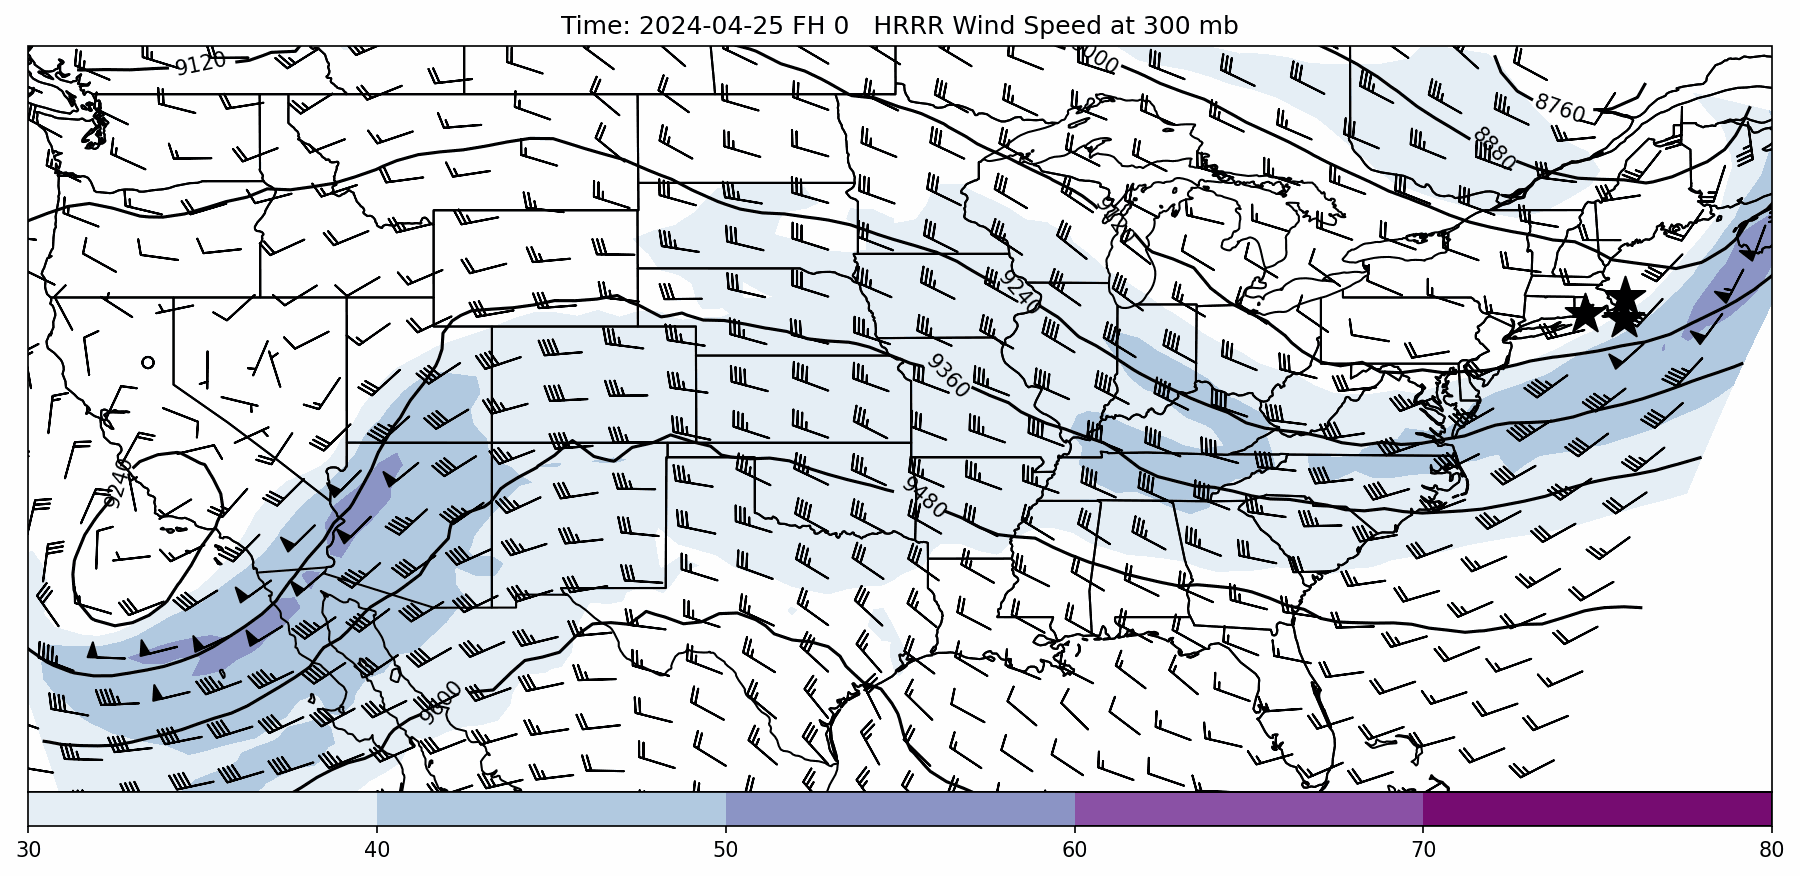

In [9]:
# List of image filenames
filenames = []
for b in range(0, int(int(fxx) / int(fxx_int)) + 1):
    filenames.append(open(f"../../../Downloads/{yr}{m}{d}_{var}_{level}_{extent}_FH_{fh[b]}_HRRR.png", 'rb'))
    
# Create Gif
images = [imageio.imread(filename) for filename in filenames]
imageio.mimsave(f"../../../Downloads/{yr}{m}{d}_loop_HRRR_{var}_{level}_{extent}_int{fxx_int}.gif", 
                images, duration=500, loop=1000)
#Show Gif
with open(f"../../../Downloads/{yr}{m}{d}_loop_HRRR_{var}_{level}_{extent}_int{fxx_int}.gif", 'rb') as f:
    display(IPImage(data=f.read(), format='gif'))